In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [3]:
X = lfw_dataset.data
y = lfw_dataset.target
names = lfw_dataset.target_names

In [4]:
# faces of names present in dataset 
for i,name in enumerate(names):
    print(i,name)

0 Colin Powell
1 Donald Rumsfeld
2 George W Bush
3 Gerhard Schroeder
4 Tony Blair


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
# PCA compution to obtain top 100 eigen vectors
n_components = 100

pca = PCA(n_components=n_components,whiten=True).fit(X_train)

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
#fitting the classifier to neural n/w
clf = MLPClassifier(hidden_layer_sizes=(1024,),batch_size=256,verbose=True,early_stopping=True).fit(X_train_pca,y_train)

Iteration 1, loss = 1.43831869
Validation score: 0.673913
Iteration 2, loss = 1.03657023
Validation score: 0.750000
Iteration 3, loss = 0.78849576
Validation score: 0.815217
Iteration 4, loss = 0.59979173
Validation score: 0.847826
Iteration 5, loss = 0.46812269
Validation score: 0.847826
Iteration 6, loss = 0.37213696
Validation score: 0.858696
Iteration 7, loss = 0.29985093
Validation score: 0.847826
Iteration 8, loss = 0.24331563
Validation score: 0.836957
Iteration 9, loss = 0.20036957
Validation score: 0.847826
Iteration 10, loss = 0.16687708
Validation score: 0.847826
Iteration 11, loss = 0.14083848
Validation score: 0.847826
Iteration 12, loss = 0.12028676
Validation score: 0.847826
Iteration 13, loss = 0.10340305
Validation score: 0.858696
Iteration 14, loss = 0.08985181
Validation score: 0.858696
Iteration 15, loss = 0.07886630
Validation score: 0.858696
Iteration 16, loss = 0.06881162
Validation score: 0.847826
Iteration 17, loss = 0.06045950
Validation score: 0.847826
Valida

In [9]:
y_pred = clf.predict(X_test_pca)

In [11]:
print(classification_report(y_test,y_pred,target_names=names))

                   precision    recall  f1-score   support

     Colin Powell       0.88      0.84      0.86        43
  Donald Rumsfeld       0.83      0.53      0.65        19
    George W Bush       0.86      0.96      0.91       107
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.86      0.80      0.83        30

         accuracy                           0.86       228
        macro avg       0.86      0.79      0.82       228
     weighted avg       0.86      0.86      0.86       228



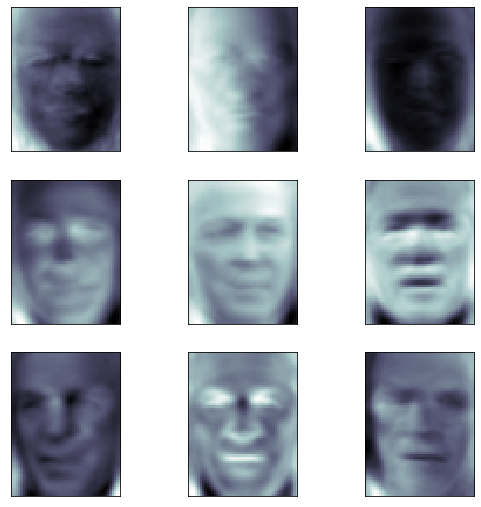

In [26]:
fig = plt.figure(figsize=(9, 9))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(lfw_dataset.images[0].shape),
              cmap=plt.cm.bone)
